# Лабораторная работа №5: Линейная регрессия

## Выполнил студент группы 6133-010402D Читоркин Егор Евгеньевич

1. Считать в `pandas.DataFrame` любой источник данных: CSV, JSON, Excel-файл, HTML-таблицу и т.п.
   > Датасет должен содержать как минимум количественные признаки. Если категориальных нет, то пропустить пункты с временным убиранием категориальных признаков. Желательно наличие обоих типов признаков в датасете.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data.csv')

2. Датасет и подготовка данных, этап 1:
   - Привести описание датасета.
   - Осуществить предобработку данных (избавиться от `null`, убрать некоторые признаки и т.п.) - "подчистить данные".
   - Нормализовать численные данные.
   - Визуализировать `heatmap`-матрицу кореллированности признаков.
   - Визуализировать взаимосвязь между `target`-переменной и каждым из признаком (с использованием `srs.pairplot` или `pandas.plotting.scatter_matrix`). Лучше всего построить диаграмму попарного распределения между таргетом и каждым из признаков отдельно (пример с `sns.FacetGrid` в лекции).
   - Разбить выборку на обучающую и тестовую.
     > Из датафреймов обучающей и тестовой выборки необходимо временно убрать категориальные признаки (исходные датафреймы сохранить для 2 этапа).

   - Привести описание датасета.

|Название признака|Значение признака|Единица измерения|
|-----------------|-----------------|-----------------|
|Price|Цена|Рубли|
|Apartment type|Тип|Первичное/вторичное|
|Metro station|Ближайшая станция метро|-|
|Minutes to metro|Время до ближайшей станции|Минуты|
|Region|Область|-|
|Number of rooms|Количество комнат|-|
|Area|Площадь|кв. м|
|Living area|Жилая площадь|кв. м|
|Kitchen area|Площадь кухни|кв. м|
|Floor|Этаж|-|
|Number of floors|Количество этажей в доме|-|
|Renovation|Внутренная отделка|-|

   - Осуществить предобработку данных (избавиться от `null`, убрать некоторые признаки и т.п.) - "подчистить данные".

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22676 entries, 0 to 22675
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             22676 non-null  float64
 1   Apartment type    22676 non-null  object 
 2   Metro station     22676 non-null  object 
 3   Minutes to metro  22676 non-null  float64
 4   Region            22676 non-null  object 
 5   Number of rooms   22676 non-null  float64
 6   Area              22676 non-null  float64
 7   Living area       22676 non-null  float64
 8   Kitchen area      22676 non-null  float64
 9   Floor             22676 non-null  float64
 10  Number of floors  22676 non-null  int64  
 11  Renovation        22676 non-null  object 
dtypes: float64(7), int64(1), object(4)
memory usage: 2.1+ MB


null нет, поэтому считаем данные предобработанными

   - Нормализовать численные данные.

In [4]:
from sklearn.preprocessing import StandardScaler

Мы будем предсказывать стоимость (Price)

In [5]:
y = data['Price']
X = data.drop(['Price'], axis=1)

In [6]:
numeric = [X.columns[i] for i in range(X.shape[1]) if X.dtypes[X.columns[i]] != 'object']
numeric

['Minutes to metro',
 'Number of rooms',
 'Area',
 'Living area',
 'Kitchen area',
 'Floor',
 'Number of floors']

In [7]:
scaler = StandardScaler()
scaler.fit(X[numeric])
X_scaled = X.copy()
X_scaled[numeric] = scaler.transform(X[numeric])
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation
0,Secondary,Опалиха,-0.949114,Moscow region,-0.684669,-0.605069,-0.719189,-0.529779,2.094025,0.863466,Cosmetic
1,Secondary,Павшино,-1.593826,Moscow region,-0.684669,-0.333009,-0.485737,-0.335677,-0.422588,-0.159125,European-style renovation
2,Secondary,Мякинино,0.340311,Moscow region,-0.684669,-0.398830,-0.585413,0.065466,0.107226,0.863466,Cosmetic
3,Secondary,Строгино,-0.626758,Moscow region,-0.684669,-0.539248,-0.590659,-0.206276,0.372132,1.681539,European-style renovation
4,Secondary,Опалиха,-0.949114,Moscow region,-0.684669,-0.501218,-0.611644,-1.112084,-0.555041,-1.181716,Without renovation


   - Визуализировать `heatmap`-матрицу кореллированности признаков.

In [8]:
import seaborn as sns

<Axes: >

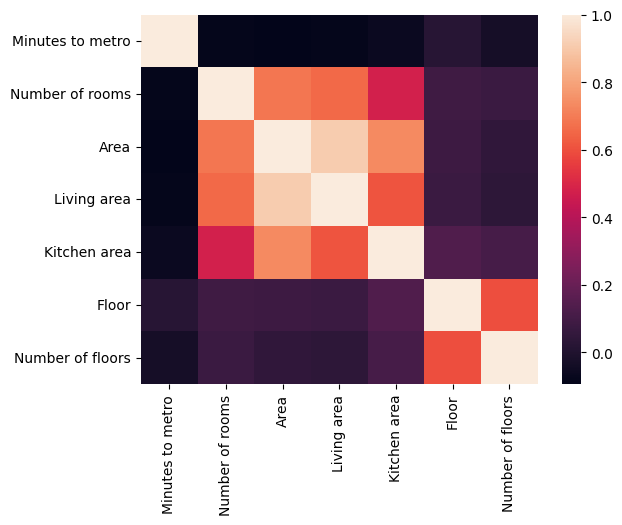

In [9]:
sns.heatmap(X_scaled[numeric].corr())

   - Визуализировать взаимосвязь между `target`-переменной и каждым из признаком (с использованием `srs.pairplot` или `pandas.plotting.scatter_matrix`). Лучше всего построить диаграмму попарного распределения между таргетом и каждым из признаков отдельно (пример с `sns.FacetGrid` в лекции).

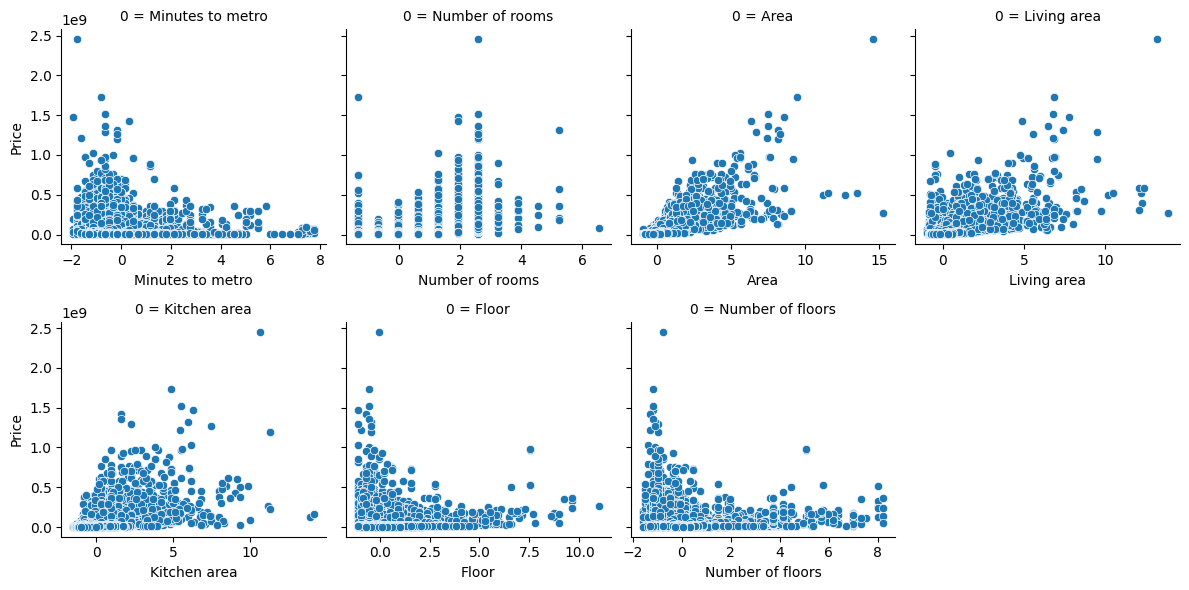

In [10]:
fig = sns.FacetGrid(pd.DataFrame(numeric), col=0, col_wrap=4, sharex=False)

for ax, varx in zip(fig.axes, numeric):
    sns.scatterplot(data=pd.concat([X_scaled[numeric], y], axis=1), x=varx, y='Price', ax=ax)
    
fig.tight_layout()

   - Разбить выборку на обучающую и тестовую.
     > Из датафреймов обучающей и тестовой выборки необходимо временно убрать категориальные признаки (исходные датафреймы сохранить для 2 этапа).

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 42)
print(y_train.shape, y_test.shape)

(15873,) (6803,)


In [13]:
X_train_w, X_test_w = X_train[numeric], X_test[numeric]

3. Регрессия МНК:
   - Обучить модель линейной регрессии `LinearRegression`.
   - Вывести метрики $MSE$, $MAE$ и $R^2$ на тестовом наборе.
   - Вывести `model.coef_` и `model.intercept_`.
   - Построить график (`barh`) с важностью коэфициентов при соответствующих признаках (сверху вниз расположены коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси).

   - Обучить модель линейной регрессии `LinearRegression`.

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model = LinearRegression()

model.fit(X_train_w, y_train)
y_pred = model.predict(X_test_w)

   - Вывести метрики $MSE$, $MAE$ и $R^2$ на тестовом наборе.

In [16]:
from sklearn.metrics import mean_absolute_error as MAE, mean_squared_error as MSE, r2_score as R2

In [17]:
print(f"Средняя квадратичная ошибка (MSE): {MSE(y_test, y_pred):.3f}")
print(f"Средняя абсолютная ошибка (MAE): {MAE(y_test, y_pred):.3f}")
print(f"Коэффициент детерминации (R2 score): {R2(y_test, y_pred):.3f}")

Средняя квадратичная ошибка (MSE): 2458989804957618.000
Средняя абсолютная ошибка (MAE): 21316342.667
Коэффициент детерминации (R2 score): 0.634


   - Вывести `model.coef_` и `model.intercept_`.

In [18]:
print(model.coef_)
print(model.intercept_)
print(f'Price = {model.intercept_}{model.coef_[0]}*{numeric[0]}{model.coef_[1]}*{numeric[1]}+{model.coef_[2]}*{numeric[2]}{model.coef_[3]}*{numeric[3]}+{model.coef_[4]}*{numeric[4]}{model.coef_[5]}*{numeric[5]}{model.coef_[6]}*{numeric[6]}')

[-2638113.85341843 -8166988.64948589 72400889.32164076  -384525.61368996
   364865.70349142 -1648761.39064899 -4020481.74340631]
36311871.53648146
Price = 36311871.53648146-2638113.853418426*Minutes to metro-8166988.649485886*Number of rooms+72400889.32164076*Area-384525.6136899553*Living area+364865.70349141676*Kitchen area-1648761.3906489904*Floor-4020481.7434063093*Number of floors


   - Построить график (`barh`) с важностью коэфициентов при соответствующих признаках (сверху вниз расположены коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси).

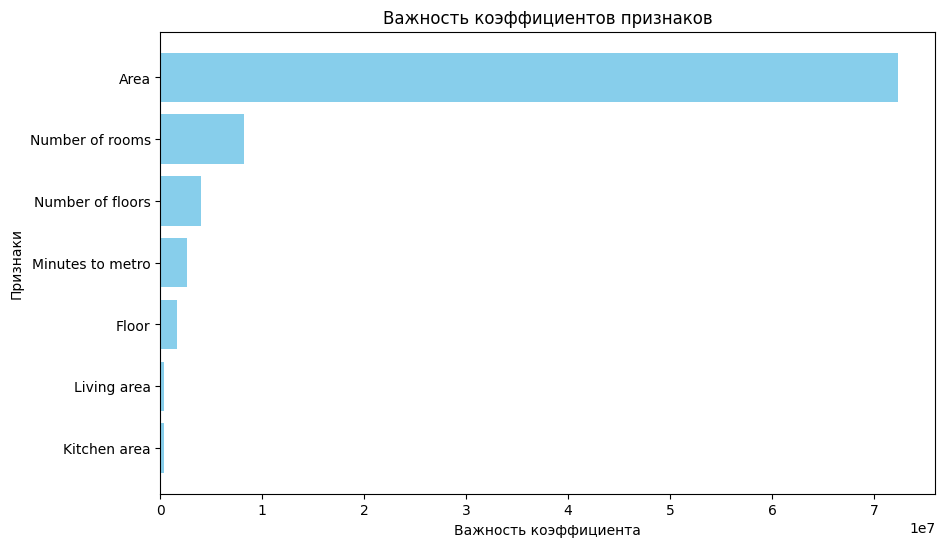

In [19]:
import numpy as np
import matplotlib.pyplot as plt

coefficients = model.coef_
feature_names = numeric

sorted_indexes = np.argsort(np.abs(coefficients))[::-1].tolist()

plt.figure(figsize=(10, 6))
plt.barh(np.array(feature_names)[sorted_indexes], np.abs(coefficients)[sorted_indexes], color='skyblue')
plt.xlabel('Важность коэффициента')
plt.ylabel('Признаки')
plt.title('Важность коэффициентов признаков')
plt.gca().invert_yaxis()
plt.show()

4. Для каждого вида регрессии (`Ridge`, `LASSO`, `Elastic Net`):
   - С использованием `GridSearchCV` осуществить подбор параметров регуляризации (`alpha` для `Ridge` и `LASSO`, `alpha` и `l1_ratio` для `Elastic Net`)
   - Вывести значения гиперпараметров, коэффициенты регрессии (`model.coef_` и `model.intercept_`) и значения метрик на тестовом наборе для наилучшей модели ($MSE$, $MAE$ и $R^2$).
   - Построить график (`barh`) с важностью коэфициентов при соответствующих признаках (сверху вниз расположены коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси).  
   
   > Запомнить лучшие модели для 2 этапа.

   - С использованием `GridSearchCV` осуществить подбор параметров регуляризации (`alpha` для `Ridge` и `LASSO`, `alpha` и `l1_ratio` для `Elastic Net`)

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [21]:
grid_ridge_lasso = {'alpha': np.arange(0.1, 5, 0.1)}

ridge = Ridge()
search_ridge = GridSearchCV(ridge, grid_ridge_lasso)
search_ridge.fit(X_train_w, y_train)

lasso = Lasso()
search_lasso = GridSearchCV(lasso, grid_ridge_lasso)
search_lasso.fit(X_train_w, y_train)

grid_elastic_net = {'alpha': np.arange(0.1, 5, 0.1), 'l1_ratio': [0.25, 0.5, 0.75]}

elastic_net = ElasticNet()
search_elastic_net = GridSearchCV(elastic_net, grid_elastic_net)
search_elastic_net.fit(X_train_w, y_train)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9]),
                         'l1_ratio': [0.25, 0.5, 0.75]})

   - Вывести значения гиперпараметров, коэффициенты регрессии (`model.coef_` и `model.intercept_`) и значения метрик на тестовом наборе для наилучшей модели ($MSE$, $MAE$ и $R^2$).

In [22]:
print(f'best ridge:\t{search_ridge.best_params_}')
print(f'best lasso:\t{search_lasso.best_params_}')
print(f'best elastic net:\t{search_elastic_net.best_params_}')

best ridge:	{'alpha': 4.9}
best lasso:	{'alpha': 4.8}
best elastic net:	{'alpha': 0.1, 'l1_ratio': 0.75}


In [23]:
best_ridge = search_ridge.best_estimator_
best_lasso = search_lasso.best_estimator_
best_elastic_net = search_elastic_net.best_estimator_

In [24]:
print('---------RIDGE---------')
print(f'model.coef_:\t{best_ridge.coef_}')
print(f'model.inteercept_:\t{best_ridge.intercept_}')
print('---------LASSO---------')
print(f'model.coef_:\t{best_lasso.coef_}')
print(f'model.inteercept_:\t{best_lasso.intercept_}')
print('---------ELASTIC NET---------')
print(f'model.coef_:\t{best_elastic_net.coef_}')
print(f'model.inteercept_:\t{best_elastic_net.intercept_}')

---------RIDGE---------
model.coef_:	[-2638946.91855705 -8138533.21908576 72204826.21950825  -256536.30872685
   416734.04949217 -1649759.08192041 -4021903.41006335]
model.inteercept_:	36311733.27552626
---------LASSO---------
model.coef_:	[-2638109.18952253 -8166977.37584834 72400830.3955656   -384475.51874534
   364867.56872759 -1648758.42071875 -4020478.69289726]
model.inteercept_:	36311871.44197464
---------ELASTIC NET---------
model.coef_:	[-2681496.15493527 -6210065.14874339 60385814.75211553  7118039.75914927
  3564698.18170852 -1707577.14176967 -4088136.31068259]
model.inteercept_:	36303238.306162395


In [25]:
print('---------RIDGE---------')
y_pred = best_ridge.predict(X_test_w)
print(f"Средняя квадратичная ошибка (MSE): {MSE(y_test, y_pred):.3f}")
print(f"Средняя абсолютная ошибка (MAE): {MAE(y_test, y_pred):.3f}")
print(f"Коэффициент детерминации (R2 score): {R2(y_test, y_pred):.3f}")

print('---------LASSO---------')
y_pred = best_lasso.predict(X_test_w)
print(f"Средняя квадратичная ошибка (MSE): {MSE(y_test, y_pred):.3f}")
print(f"Средняя абсолютная ошибка (MAE): {MAE(y_test, y_pred):.3f}")
print(f"Коэффициент детерминации (R2 score): {R2(y_test, y_pred):.3f}")

print('---------ELASTIC NET---------')
y_pred = best_elastic_net.predict(X_test_w)
print(f"Средняя квадратичная ошибка (MSE): {MSE(y_test, y_pred):.3f}")
print(f"Средняя абсолютная ошибка (MAE): {MAE(y_test, y_pred):.3f}")
print(f"Коэффициент детерминации (R2 score): {R2(y_test, y_pred):.3f}")

---------RIDGE---------
Средняя квадратичная ошибка (MSE): 2459279867426390.500
Средняя абсолютная ошибка (MAE): 21322205.800
Коэффициент детерминации (R2 score): 0.634
---------LASSO---------
Средняя квадратичная ошибка (MSE): 2458989944422733.000
Средняя абсолютная ошибка (MAE): 21316343.946
Коэффициент детерминации (R2 score): 0.634
---------ELASTIC NET---------
Средняя квадратичная ошибка (MSE): 2492464899636570.000
Средняя абсолютная ошибка (MAE): 21763570.526
Коэффициент детерминации (R2 score): 0.629


   - Построить график (`barh`) с важностью коэфициентов при соответствующих признаках (сверху вниз расположены коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси).  
   
   > Запомнить лучшие модели для 2 этапа.

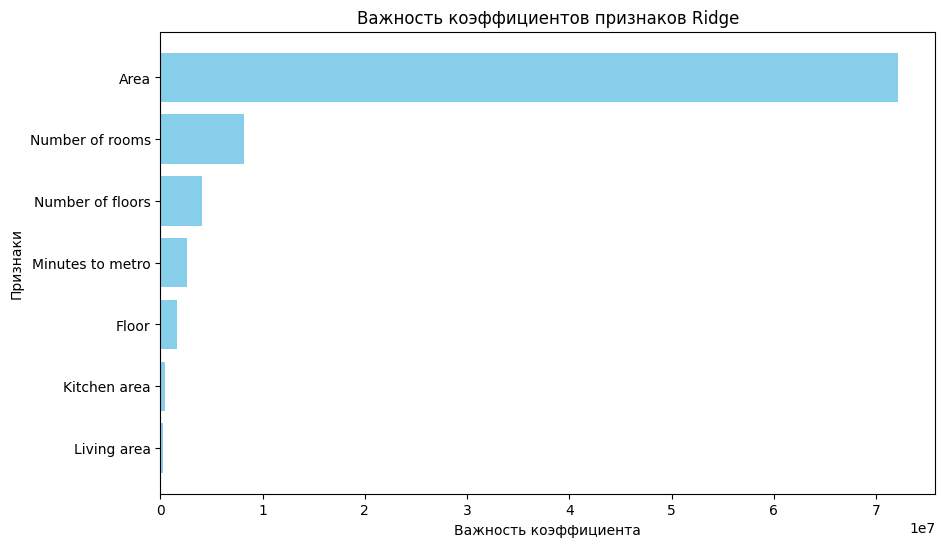

In [26]:
coefficients = best_ridge.coef_
feature_names = numeric

sorted_indexes = np.argsort(np.abs(coefficients))[::-1].tolist()

plt.figure(figsize=(10, 6))
plt.barh(np.array(feature_names)[sorted_indexes], np.abs(coefficients)[sorted_indexes], color='skyblue')
plt.xlabel('Важность коэффициента')
plt.ylabel('Признаки')
plt.title('Важность коэффициентов признаков Ridge')
plt.gca().invert_yaxis()
plt.show()

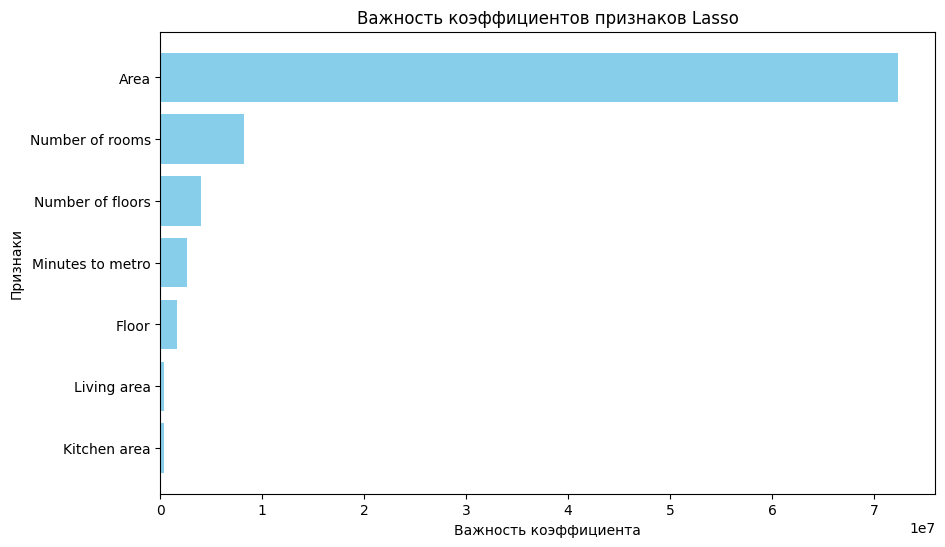

In [27]:
coefficients = best_lasso.coef_
feature_names = numeric

sorted_indexes = np.argsort(np.abs(coefficients))[::-1].tolist()

plt.figure(figsize=(10, 6))
plt.barh(np.array(feature_names)[sorted_indexes], np.abs(coefficients)[sorted_indexes], color='skyblue')
plt.xlabel('Важность коэффициента')
plt.ylabel('Признаки')
plt.title('Важность коэффициентов признаков Lasso')
plt.gca().invert_yaxis()
plt.show()

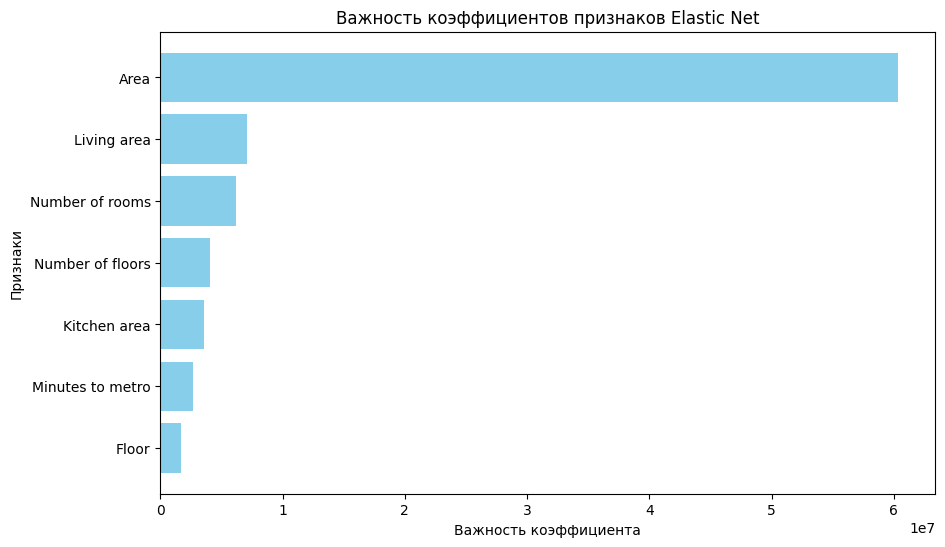

In [28]:
coefficients = best_elastic_net.coef_
feature_names = numeric

sorted_indexes = np.argsort(np.abs(coefficients))[::-1].tolist()

plt.figure(figsize=(10, 6))
plt.barh(np.array(feature_names)[sorted_indexes], np.abs(coefficients)[sorted_indexes], color='skyblue')
plt.xlabel('Важность коэффициента')
plt.ylabel('Признаки')
plt.title('Важность коэффициентов признаков Elastic Net')
plt.gca().invert_yaxis()
plt.show()

5. Датасет и подготовка данных, этап 2:
   - Использовать датафреймы после разбиения на обучающую и тестовую выборки из 1 этапа с категориальными признаками.
   - Закодировать категориальные признаки в обучающей и тестовой выборках.

In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22676 entries, 0 to 22675
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Apartment type    22676 non-null  object 
 1   Metro station     22676 non-null  object 
 2   Minutes to metro  22676 non-null  float64
 3   Region            22676 non-null  object 
 4   Number of rooms   22676 non-null  float64
 5   Area              22676 non-null  float64
 6   Living area       22676 non-null  float64
 7   Kitchen area      22676 non-null  float64
 8   Floor             22676 non-null  float64
 9   Number of floors  22676 non-null  int64  
 10  Renovation        22676 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.9+ MB


In [30]:
keys, values = pd.factorize(X['Metro station'].unique())
d_station = dict(zip(values, keys))
keys, values = pd.factorize(X['Apartment type'].unique())
d_ap = dict(zip(values, keys))
keys, values = pd.factorize(X['Region'].unique())
d_reg = dict(zip(values, keys))
keys, values = pd.factorize(X['Renovation'].unique())
d_ren = dict(zip(values, keys))

In [35]:
X_train['Metro station'] = X_train['Metro station'].replace(d_station)
X_train['Apartment type'] = X_train['Apartment type'].replace(d_ap)
X_train['Region'] = X_train['Region'].replace(d_reg)
X_train['Renovation'] = X_train['Renovation'].replace(d_ren)

X_test['Metro station'] = X_test['Metro station'].replace(d_station)
X_test['Apartment type'] = X_test['Apartment type'].replace(d_ap)
X_test['Region'] = X_test['Region'].replace(d_reg)
X_test['Renovation'] = X_test['Renovation'].replace(d_ren)

C:\Users\79372\AppData\Local\Temp\ipykernel_15100\1799891007.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train['Metro station'] = X_train['Metro station'].replace(d_station)
C:\Users\79372\AppData\Local\Temp\ipykernel_15100\1799891007.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train['Apartment type'] = X_train['Apartment type'].replace(d_ap)
C:\Users\79372\AppData\Local\Temp\ipykernel_15100\1799891007.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. 

6. Регрессии, этап 2:
   - Обучить `LinearRegression`, лучшие модели `Ridge`, `LASSO`, `Elastic Net` на обучающем наборе с категориальными признаками.
   - Вывести значения гиперпараметров, коэффициенты регрессии (`model.coef_` и `model.intercept_`) и значения метрик на тестовом наборе ($MSE$, $MAE$ и $R^2$).
   - Сравнить метрики с наличием категориальных признаков и без для каждой из моделей.
   - Выбрать лучшую модель.
   - Построить график (`barh`) с важностью коэфициентов при соответствующих признаках (сверху вниз расположены коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси).
   - Осуществить фильтрацию признаков с использованием `Recursive Feature Elimination`.
   - Построить график (`barh`) с важностью коэфициентов при соответствующих признаках (сверху вниз расположены коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси).
   - Вывести значения метрик на тестовом наборе ($MSE$, $MAE$ и $R^2$).

   - Обучить `LinearRegression`, лучшие модели `Ridge`, `LASSO`, `Elastic Net` на обучающем наборе с категориальными признаками.

In [36]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

best_ridge.fit(X_train, y_train)
best_lasso.fit(X_train, y_train)
best_elastic_net.fit(X_train, y_train)

ElasticNet(alpha=0.1, l1_ratio=0.75)

   - Вывести значения гиперпараметров, коэффициенты регрессии (`model.coef_` и `model.intercept_`) и значения метрик на тестовом наборе ($MSE$, $MAE$ и $R^2$).

In [39]:
print('---------LINEAR REGRESSION---------')
y_pred = linear_model.predict(X_test)
print(f"Средняя квадратичная ошибка (MSE): {MSE(y_test, y_pred):.3f}")
print(f"Средняя абсолютная ошибка (MAE): {MAE(y_test, y_pred):.3f}")
print(f"Коэффициент детерминации (R2 score): {R2(y_test, y_pred):.3f}")
print(f"model.coef_:\t{linear_model.coef_}")
print(f"model.intercept_:\t{linear_model.intercept_}")

print('---------RIDGE---------')
y_pred = best_ridge.predict(X_test)
print(f"Средняя квадратичная ошибка (MSE): {MSE(y_test, y_pred):.3f}")
print(f"Средняя абсолютная ошибка (MAE): {MAE(y_test, y_pred):.3f}")
print(f"Коэффициент детерминации (R2 score): {R2(y_test, y_pred):.3f}")
print(f"model.coef_:\t{best_ridge.coef_}")
print(f"model.intercept_:\t{best_ridge.intercept_}")

print('---------LASSO---------')
y_pred = best_lasso.predict(X_test)
print(f"Средняя квадратичная ошибка (MSE): {MSE(y_test, y_pred):.3f}")
print(f"Средняя абсолютная ошибка (MAE): {MAE(y_test, y_pred):.3f}")
print(f"Коэффициент детерминации (R2 score): {R2(y_test, y_pred):.3f}")
print(f"model.coef_:\t{best_lasso.coef_}")
print(f"model.intercept_:\t{best_lasso.intercept_}")

print('---------ELASTIC NET---------')
y_pred = best_elastic_net.predict(X_test)
print(f"Средняя квадратичная ошибка (MSE): {MSE(y_test, y_pred):.3f}")
print(f"Средняя абсолютная ошибка (MAE): {MAE(y_test, y_pred):.3f}")
print(f"Коэффициент детерминации (R2 score): {R2(y_test, y_pred):.3f}")
print(f"model.coef_:\t{best_elastic_net.coef_}")
print(f"model.intercept_:\t{best_elastic_net.intercept_}")

---------LINEAR REGRESSION---------
Средняя квадратичная ошибка (MSE): 2375278461738504.500
Средняя абсолютная ошибка (MAE): 20515257.531
Коэффициент детерминации (R2 score): 0.646
model.coef_:	[-6.74120620e+06 -1.45117847e+02 -2.91328769e+06 -1.39002113e+06
 -8.33916954e+06  6.96488404e+07 -1.70641247e+06 -2.00905742e+05
 -3.75385182e+05 -5.96884898e+06  7.30227232e+06]
model.intercept_:	34050136.050593406
---------RIDGE---------
Средняя квадратичная ошибка (MSE): 2375543949783045.000
Средняя абсолютная ошибка (MAE): 20520535.115
Коэффициент детерминации (R2 score): 0.646
model.coef_:	[-6.71148679e+06 -2.16687918e+02 -2.91337504e+06 -1.37898857e+06
 -8.31132125e+06  6.94526022e+07 -1.57809718e+06 -1.51720680e+05
 -3.78662694e+05 -5.96985786e+06  7.31070152e+06]
model.intercept_:	34045488.8073708
---------LASSO---------
Средняя квадратичная ошибка (MSE): 2375278590465899.500
Средняя абсолютная ошибка (MAE): 20515258.742
Коэффициент детерминации (R2 score): 0.646
model.coef_:	[-6.741142

   - Сравнить метрики с наличием категориальных признаков и без для каждой из моделей.

Здесь курсив - это выбор лучшего варианта (без категориальных или с ними), жирный - лучшее значение в строке

|Metric|Linear Regression (only num)|Linear Regression (all)|Ridge (only num)|Ridge (all)|Lasso (only num)|Lasso (all)|Eliastic Net (only num)|Eliastic Net (all)|
|------|----------------------------|-----------------------|----------------|-----------|----------------|-----------|-----------------------|------------------|
|MSE|2458989804957618.000|***2375278461738504.50***|2459279867426390.500|*2375543949783045.000*|2458989944422733.000|*2375278590465899.500*|2492464899636570.000|*2406809388217902.500*|
|MAE|21316342.667|***20515257.531***|21322205.800|*20520535.115*|21316343.946|*20515258.742*|21763570.526|*20914940.651*|
|$R^2$|0.634|***0.646***|0.634|***0.646***|0.634|***0.646***|0.629|*0.642*|

Для всех моделей добавление категориальных переменных позволило улучшить все метрики (уменьшить ошибку и увеличить $R^2$)

   - Выбрать лучшую модель.

In [40]:
best_model = linear_model

   - Построить график (`barh`) с важностью коэфициентов при соответствующих признаках (сверху вниз расположены коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси).

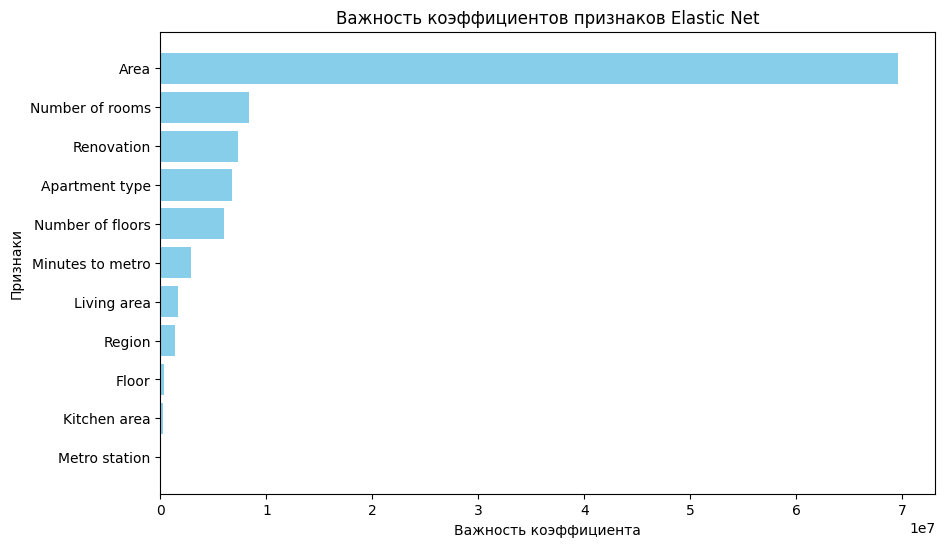

In [41]:
coefficients = best_model.coef_
feature_names = X_train.columns

sorted_indexes = np.argsort(np.abs(coefficients))[::-1].tolist()

plt.figure(figsize=(10, 6))
plt.barh(np.array(feature_names)[sorted_indexes], np.abs(coefficients)[sorted_indexes], color='skyblue')
plt.xlabel('Важность коэффициента')
plt.ylabel('Признаки')
plt.title('Важность коэффициентов признаков Elastic Net')
plt.gca().invert_yaxis()
plt.show()

   - Осуществить фильтрацию признаков с использованием `Recursive Feature Elimination`.

In [42]:
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

# create pipeline
rfe = RFE(estimator=LinearRegression(), n_features_to_select=5)
model = LinearRegression()

rf_pipeline = Pipeline(steps=[('rfe', rfe), ('model', model)])
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('rfe',
                 RFE(estimator=LinearRegression(), n_features_to_select=5)),
                ('model', LinearRegression())])

   - Построить график (`barh`) с важностью коэфициентов при соответствующих признаках (сверху вниз расположены коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси).

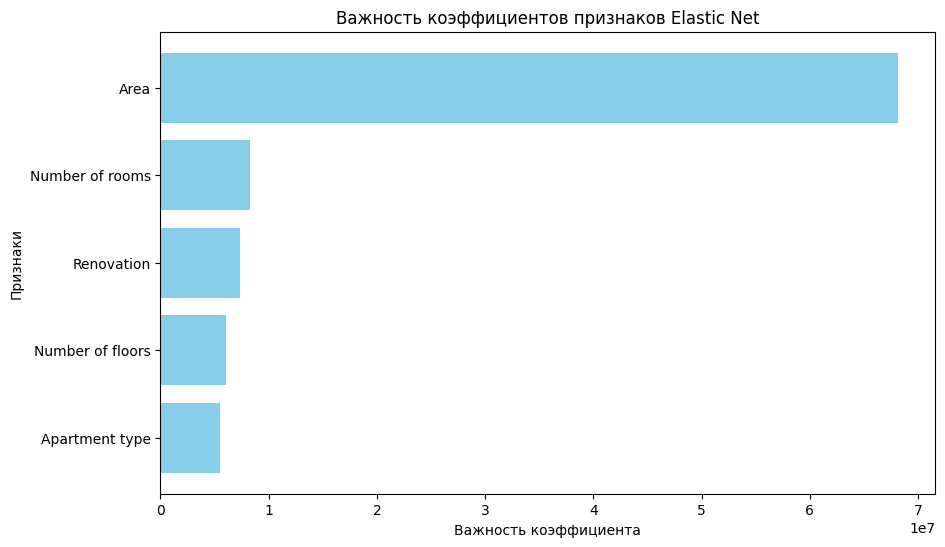

In [43]:
coefficients = model.coef_
feature_names = rf_pipeline.named_steps['rfe'].get_feature_names_out()

sorted_indexes = np.argsort(np.abs(coefficients))[::-1].tolist()

plt.figure(figsize=(10, 6))
plt.barh(np.array(feature_names)[sorted_indexes], np.abs(coefficients)[sorted_indexes], color='skyblue')
plt.xlabel('Важность коэффициента')
plt.ylabel('Признаки')
plt.title('Важность коэффициентов признаков Elastic Net')
plt.gca().invert_yaxis()
plt.show()

   - Вывести значения метрик на тестовом наборе ($MSE$, $MAE$ и $R^2$).

In [44]:
y_pred = rf_pipeline.predict(X_test)

print(f"Средняя квадратичная ошибка (MSE):\t{MSE(y_test, y_pred):.3f}")
print(f"Средняя абсолютная ошибка (MAE):\t{MAE(y_test, y_pred):.3f}")
print(f"Коэффициент детерминации (R2 score):\t{R2(y_test, y_pred):.3f}")

Средняя квадратичная ошибка (MSE):	2391570629962723.500
Средняя абсолютная ошибка (MAE):	20478681.870
Коэффициент детерминации (R2 score):	0.644


7. Сделать вывод:
   - Лучший регрессор, обученный на данных без категориальных признаков (значения метрик на тестовом наборе).
   - Лучший регрессор, обученный на данных с категориальными признаками (значения метрик на тестовом наборе).
   - Вывод о результатах использования `Recursive Feature Elimination` (лучше или хуже - значения метрик).

Лучший без категориальных - Линейная регрессия

Лучший с категориальными - Линейная регрессия

Коэффициент детерминации и MSE стали немного хуже, но MAE достигла лучшего значения